### Exercise 4.10 part 1

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### import dataset

In [2]:
#create a path
path = r'C:\Users\Lumex\Documents\Achievement_4_Project\InstaCart Basket Analysis'

In [3]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customer_aggregated.pkl'))

In [4]:
df.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'match', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_regularity',
       'frequency_flag', 'first_name', 'last_name', 'Gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       '_merge'],
      dtype='object')

In [5]:
#viewing the dataframe
df.head(5)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,Gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### step 2: address security issues. Drop the first name and last name column, so that the customers are not identified in the analysis.

In [6]:
#Drop 'First Name' and 'Last name' columns from dataframe
df.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [7]:
df.head(5)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,customer_regularity,frequency_flag,Gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,0,2539329,1,1,2,8,NaN,196,1,0,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [8]:
df.tail(5)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,customer_regularity,frequency_flag,Gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
32404854,3421081,2977660,206209,13,1,12,7.0,14197,5,1,...,22.0,Non_frequent_customer,Female,Iowa,74,9/14/2019,3,married,137969,both
32404855,3421081,2977660,206209,13,1,12,7.0,38730,6,0,...,22.0,Non_frequent_customer,Female,Iowa,74,9/14/2019,3,married,137969,both
32404856,3421081,2977660,206209,13,1,12,7.0,31477,7,0,...,22.0,Non_frequent_customer,Female,Iowa,74,9/14/2019,3,married,137969,both
32404857,3421081,2977660,206209,13,1,12,7.0,6567,8,0,...,22.0,Non_frequent_customer,Female,Iowa,74,9/14/2019,3,married,137969,both
32404858,3421081,2977660,206209,13,1,12,7.0,22920,9,0,...,22.0,Non_frequent_customer,Female,Iowa,74,9/14/2019,3,married,137969,both


#### 2.1 modify the income to income_flag

In [9]:
## Conditions:
# If income is less than 50,000 then 'Low income'
# If income is greater than or equal to 50,000 and less than 100,000 then 'Middle income'
# If income is greater than or equal to 100,000 then 'High income'
# Create a result list for income column showing low income, middle income, or high income. 
result = []

for income in df['income']:
    if income < 50000:
        result.append('Low income')
    elif income >= 50000 and income < 100000:
        result.append('Middle income')
    elif income >= 100000:
        result.append('High income')
    else: 
        result.append('Other')

# Add a column 'income_group' and assign the result list
df['income_flag'] = result

df['income_flag'].value_counts()

income_flag
High income      14814766
Middle income    13996010
Low income        3594083
Name: count, dtype: int64

#### 2.2 modify age to age_flag

In [10]:
# Age was classified into the following:
# young adult - (0-24)
# Adult - (25-44)
# Older adult - (45-64)
# Senior - (65+)
# Create a result list for Age column showing Young adult, Adult, Older Adult, or Senior
result = []

for age in df['age']:
    if age < 25:
        result.append('Young adult')
    elif age >= 25 and age < 45:
        result.append('Adult')
    elif age >= 45 and age < 65:
        result.append('Older adult')
    elif age >= 65:
        result.append('Senior')
    else: 
        result.append('Other')

# Add a column 'age_group' and assign the result list
df['age_flag'] = result

df['age_flag'].value_counts()

age_flag
Older adult    10139691
Adult          10117083
Senior          8575084
Young adult     3573001
Name: count, dtype: int64

In [11]:
#view the df to make sure that new column work correctly
df.head(50)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,income_flag,age_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
5,1,2398795,1,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
6,1,2398795,1,2,3,7,15.0,10258,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
7,1,2398795,1,2,3,7,15.0,12427,3,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
8,1,2398795,1,2,3,7,15.0,13176,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult
9,1,2398795,1,2,3,7,15.0,26088,5,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Low income,Adult


In [12]:
# Drop 'age' and 'income' columns
df = df.drop(columns = ['age', 'income', '_merge'])

In [13]:
df.head(5)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spender_flag,customer_regularity,frequency_flag,Gender,state,date_joined,number_of_dependents,marital_status,income_flag,age_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,2/17/2019,3,married,Low income,Adult
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,2/17/2019,3,married,Low income,Adult
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,2/17/2019,3,married,Low income,Adult
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,2/17/2019,3,married,Low income,Adult
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,2/17/2019,3,married,Low income,Adult


##### Security issue was sorted by removing columns that might aid identifying the customers. The firt_name, last_name, age and income column was removed. The income and age column was turned to a categorized data

#### Step 3:Segmentation of the state column into region

In [14]:
result = []

for value in df["state"]:
  if (value == 'Maine') or ( value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
             result.append("Northeast")
  elif (value =='Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value =='Nebraska') or (value =='Kansas') or (value =='Minnesota') or (value =='Iowa') or (value =='Missouri'):
             result.append("Midwest")
  elif (value =='Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value =='Virginia') or (value =='West Virginia') or (value =='North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value =='Florida') or (value =='Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):  
             result.append("South")  
  elif (value =='Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value =='Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
             result.append("West")
  else:
    result.append("Not Part of USA")

In [15]:
# creat a new column to store Region in dataframe
df['region'] = result

In [16]:
# view the stored new column
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### Comparing customer behaviour based on US regions.

Text(0.5, 1.0, 'Distribution of Customers by Region')

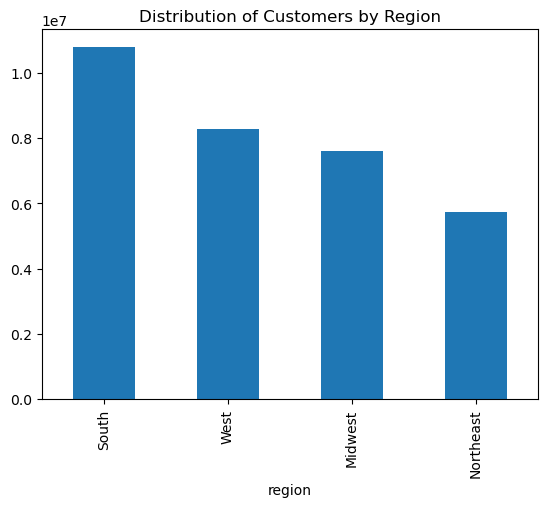

In [17]:
#create a bar chart showing the distribtion of the customers based on region.
bar8 = df['region'].value_counts().plot.bar()
plt.title('Distribution of Customers by Region')

In [18]:
# Creating crosstab between Regions and Spender_Type
spending_habit_per_region = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [19]:
#view result
spending_habit_per_region

spender_flag,High_spender,Low_spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31223,8261690


Text(0.5, 1.0, 'Spending Habits by Region')

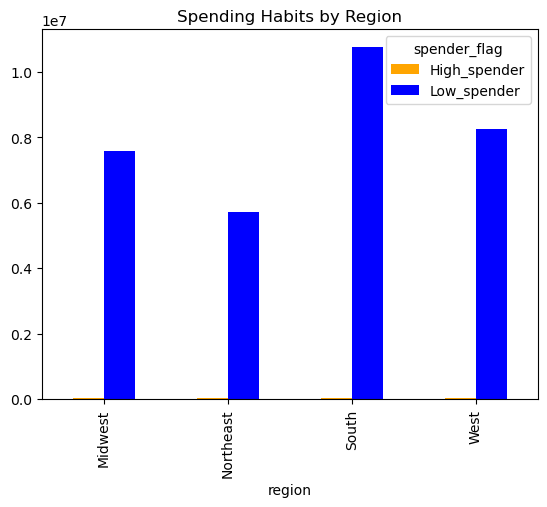

In [20]:
#Create a barchart of spending_habit of customers based on region
spending_habit_barchart = spending_habit_per_region.plot.bar(color = ['orange', 'blue'])
plt.title('Spending Habits by Region')

##### Observation
    Majority of the customers from all the regions are low_spender.
    In the low_spender category, the south has the highest number of low_spending customers while northeast has the least.
    The rate of the high_spending customers are low for all the region.

In [21]:
#export the chart
spending_habit_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barchart_spending_habit_by_region.png'))

In [22]:
#create a crosstab for frequency_flag and region columns
frequency_flag_by_region = pd.crosstab(df['region'], df['frequency_flag'], dropna = False)

In [23]:
#print the crosstab 
frequency_flag_by_region 

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer,NaN
region,,,,
Midwest,5017709,863419,1716197,0
Northeast,3804566,630182,1287988,0
South,7192372,1215088,2384420,5
West,5545206,927748,1819959,0


In [24]:
#view the missing value in the dataframe.
df.loc[df['frequency_flag'].isnull()]

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,customer_regularity,frequency_flag,Gender,state,date_joined,number_of_dependents,marital_status,income_flag,age_flag,region
25156870,2655584,895835,159838,1,0,17,NaN,22198,1,0,...,NaN,NaN,Male,Arkansas,11/9/2018,3,married,High income,Older adult,South
25156871,2655584,895835,159838,1,0,17,NaN,23695,2,0,...,NaN,NaN,Male,Arkansas,11/9/2018,3,married,High income,Older adult,South
25156872,2655584,895835,159838,1,0,17,NaN,10749,3,0,...,NaN,NaN,Male,Arkansas,11/9/2018,3,married,High income,Older adult,South
25156873,2655584,895835,159838,1,0,17,NaN,21334,5,0,...,NaN,NaN,Male,Arkansas,11/9/2018,3,married,High income,Older adult,South
25156874,2655584,895835,159838,1,0,17,NaN,33401,6,0,...,NaN,NaN,Male,Arkansas,11/9/2018,3,married,High income,Older adult,South


##### Observation from the missing values
       They are all new customers who are making their first orders.

Text(0.5, 1.0, 'Customer Order Frequency by Region')

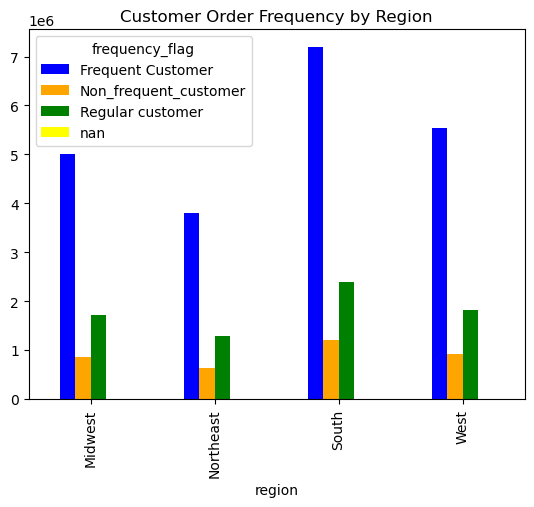

In [25]:
#create a barchart for frequency_flag by region
frequency_flag_by_region_barchart = frequency_flag_by_region.plot.bar(color = ['blue','orange','green','yellow'])
plt.title('Customer Order Frequency by Region')

In [26]:
#export the chart
frequency_flag_by_region_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_flag_by_region_barchart.png'))

#### Exclusion flag for low_activity customers.

In [27]:
# Create exclusion flag for customers with less than 5 orders
result = []

for value in df['max_order']:
    if value <5:
        result.append('Low-activity customer')
    else: 
        result.append('High-activity customer')

In [28]:
df['activity_level'] = result

In [29]:
df['activity_level'].value_counts()

activity_level
High-activity customer    30964564
Low-activity customer      1440295
Name: count, dtype: int64

In [30]:
# Check the count of 'user_id' without exclusion of low activity customers
df.nunique()

Unnamed: 0                3214685
order_id                  3214685
user_id                    206209
order_number                   99
orders_day_of_week              7
order_hour_of_day              24
days_since_prior_order         31
product_id                  49659
add_to_cart_order             145
reordered                       2
product_name                49661
aisle_id                      134
department_id                  21
prices                        240
match                           1
busiest_day                     3
busiest_days                    3
busiest_period_of_day           3
max_order                      99
loyalty_flag                    3
average_spend              128065
spender_flag                    2
customer_regularity            61
frequency_flag                  3
Gender                          2
state                          51
date_joined                  1187
number_of_dependents            4
marital_status                  4
income_flag   

In [31]:
# Create a new dataframe 'df_exclusion' that excludes all rows where 'activity_level' is 'Low-activity customer'
df_exclusion = df[df['activity_level'] != 'Low-activity customer']

In [32]:
# Check shape of new dataframe
df_exclusion.shape

(30964564, 33)

In [33]:
# Check count of 'user_id' with exclusion
df_exclusion.nunique()

Unnamed: 0                3064375
order_id                  3064375
user_id                    162631
order_number                   99
orders_day_of_week              7
order_hour_of_day              24
days_since_prior_order         31
product_id                  49628
add_to_cart_order             145
reordered                       2
product_name                49630
aisle_id                      134
department_id                  21
prices                        240
match                           1
busiest_day                     3
busiest_days                    3
busiest_period_of_day           3
max_order                      95
loyalty_flag                    3
average_spend              119832
spender_flag                    2
customer_regularity            61
frequency_flag                  3
Gender                          2
state                          51
date_joined                  1187
number_of_dependents            4
marital_status                  4
income_flag   

#### Export the exclusion data

In [34]:
# Export data
df_exclusion.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_customer_exclusion.pkl'))